In [1]:
##IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
#READING THE DATA
loan_data = pd.read_csv("D:\mca\pg\lending_club\loan.csv")
loan_data.head()

C:\Users\Shweta\AppData\Local\Temp\ipykernel_22184\843028827.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("D:\mca\pg\lending_club\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#CHECKING THE SHAPE OF DATA
loan_data.shape


(39717, 111)

In [4]:
#CHECKING FOR NULL VALUES
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# IT CAN BE SEEN THAT THERE ARE A LOTS OF NULL VALUES.
**IN THIS CASE THERE'S NO OTHER WAY TO FILL IN THOSE VALUES.
SO WE ARE GOING TO REMOVE THEM.

In [5]:
loan_data.dropna(axis =1, how='all', inplace= True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# # There are several columns which are single valued
__They are of no use use for our analysis. So we are removing them.__

In [6]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns out of which some correspond to the post approval of loan
1. We are analyzing the user details and the driving factors of loan defaulting before approving loan. And we'll remove corresponding variables/columns.
2. There are still some extra columns like- 'id', 'member_id',"url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". these are irrelevant and doesn't contribute to our research. So those will be discarded. 
3. "desc" has description which is not needed now.
4. "out_prncp_inv" , "total_pymnt_inv " are useful for investors not for loan.
5. "funded_amnt" is not needed. We only need to know how much is actual fund for which we have "funded_amt_inv".
6. Now we have sorted required data and will remove the above mention columns.



In [7]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)


In [8]:
loan_data.shape

(39717, 21)

# List of Post-approval Features

➼delinq_2yrs 
➼revol_bal 
➼out_prncp 
➼total_pymnt 
➼total_rec_prncp 
➼total_rec_int 
➼total_rec_late_fee 
➼recoveries 
➼collection_recovery_fee 
➼last_pymnt_d 
➼last_pymnt_amnt 
➼next_pymnt_d 
➼chargeoff_within_12_mths 
➼mths_since_last_delinq 
➼mths_since_last_record 

In [9]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### We have to predict who is likely to default and that's possible when either the loan is fully paid or charged off.
• We cannot make anything for current loans. So, we'll remove current loan status.

In [10]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [11]:
# CHECKING FOR MISSING VALUES
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

### Handling missing values
• First we'll check the data type of each columns.

• Columns with missing values are = emp_length, revol_util.


In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [13]:
print("Mode- "+ loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode- 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### The mode value has higher frequency
• So, we'll replace NAN value with mode.

In [14]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [15]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [16]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


### Fixing data types of columns:
• Columns "revol_util" and "int_rate" are described as 'object' because of % sign. So'll we need to fix it.

• In column, "emp_length" (<1yaer) is assumed as0, and 10+years as 10.

• Column "term" can be declared as categorical variable. As there's only two variables in it {"36 months" or "60 months"}

In [17]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x: x.split('%')[0]))

In [18]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x: x.split('%')[0]))

In [19]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x:0 if "<"in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [20]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


C:\Users\Shweta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

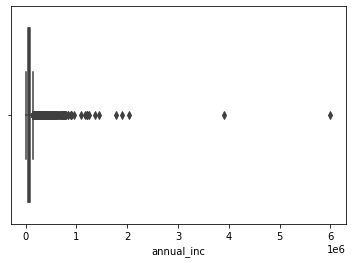

In [21]:
#OUTLIER TREATMENT
sns.boxplot(loan_data['annual_inc'])

In [22]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

### About the outliers
➼ Looking at the box plot it is clear the outliers are there.So, will be removing it.

➼ Checking the Quantile info, we saw that after 95 percentile it seems to be disconnected as well as there is huge increase of value from 90th to 95th percentile.

➼ Removing outliers 0.95

In [23]:
quantile_info = loan_data.annual_inc.quantile([0.5,0.75,0.95,0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [24]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc<=per_95_annual_inc]

C:\Users\Shweta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

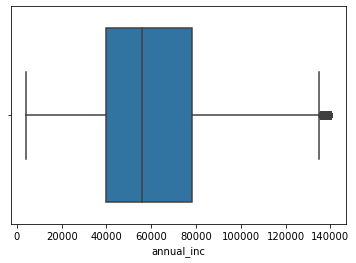

In [25]:
sns.boxplot(loan_data.annual_inc)

### Analyzing other numerical variables for outliers.
•dti                                                

•loan_amnt                              

•funded_amnt_inv                                   



C:\Users\Shweta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

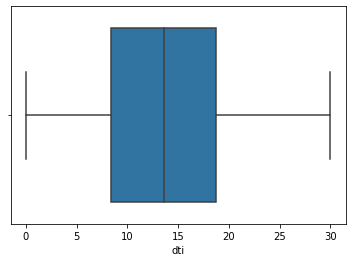

In [26]:
sns.boxplot(loan_data.dti)

C:\Users\Shweta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

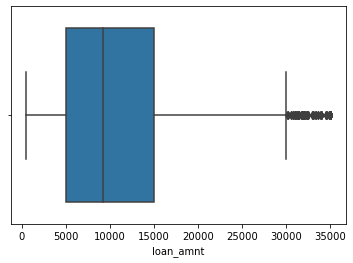

In [27]:
sns.boxplot(loan_data.loan_amnt)

In [28]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975,0.98,0.99,1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

C:\Users\Shweta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funded_amnt_inv'>

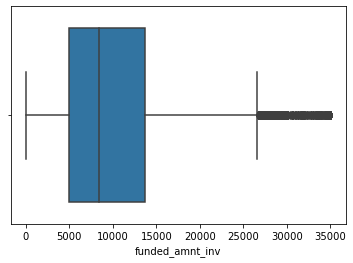

In [29]:
sns.boxplot(loan_data.funded_amnt_inv)

In [30]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

## Visualizing categorical data
 

In [31]:
#Extracting sub_grade variable(int value) from sub_grade column
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x: x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

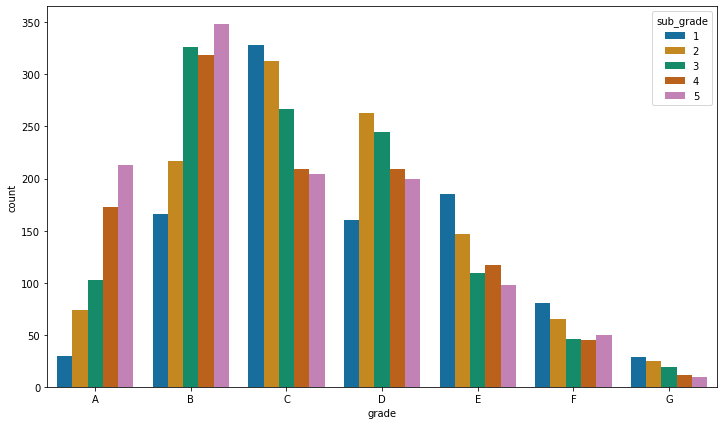

In [32]:
#We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots
ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])


<AxesSubplot:xlabel='grade', ylabel='count'>

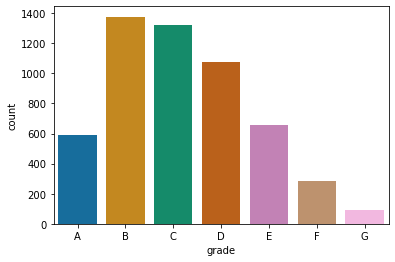

In [33]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


## Analyzing home_ownership

In [34]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [35]:
#Replacing 'NONE'with 'OTHERS'
loan_data['home_ownership'].replace(to_replace=['NONE'], value ='OTHER',inplace = True)


In [36]:
#checking unique values again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

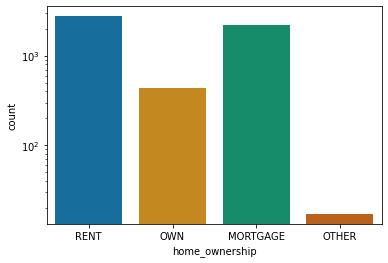

In [37]:
fig, ay= plt.subplots(figsize = (6,4))
ay.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])


## Analyzing purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

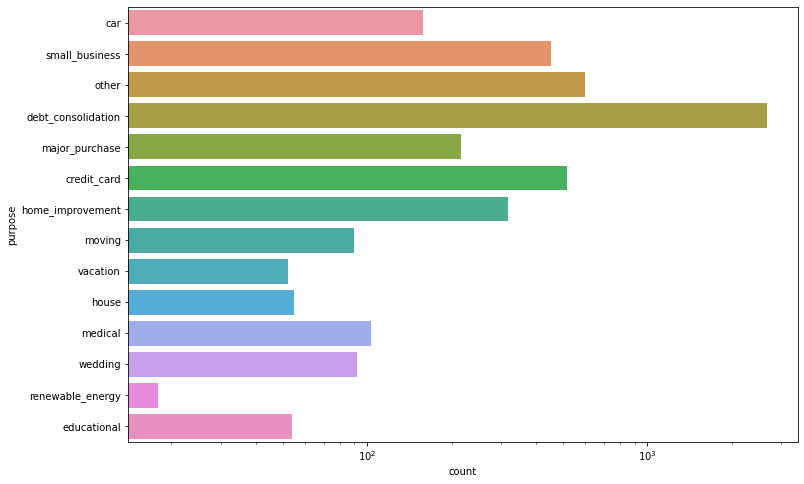

In [38]:
fig, ax =plt.subplots(figsize =(12,8))
ax.set(xscale='log')
sns.countplot(y ='purpose', data =loan_data[loan_data.loan_status=='Charged Off'])

In [39]:
# CREATING BINS FOR SOME NUMERICAL VARIABLE TO MAKE THEM CATEGORICAL
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [40]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


<AxesSubplot:xlabel='emp_length', ylabel='count'>

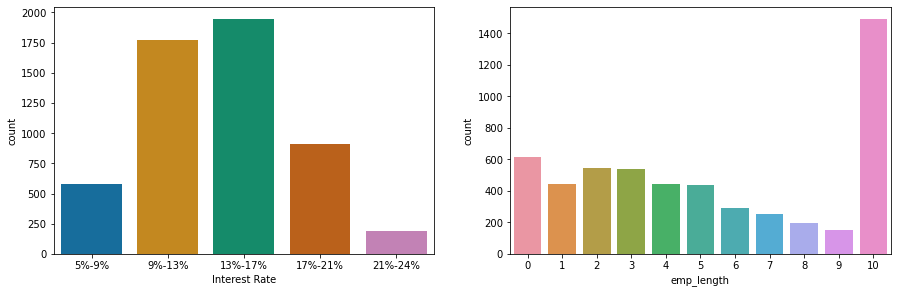

In [41]:
#ANALYZING IINTERST RATE WRT THE INTEREST RATE BINS
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])


<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

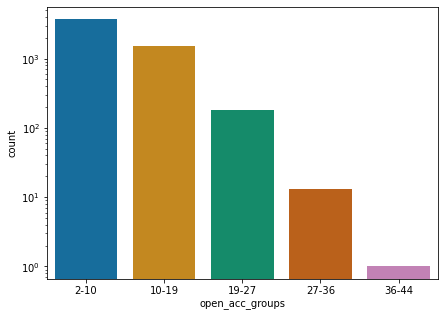

In [42]:
#SIMILARLY ANALYZING open_acc, revol_util, total_acc, annual_inc
fig, ax= plt.subplots(figsize=(7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status=='Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

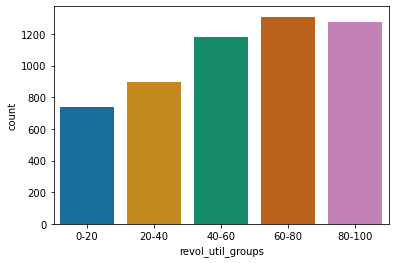

In [43]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

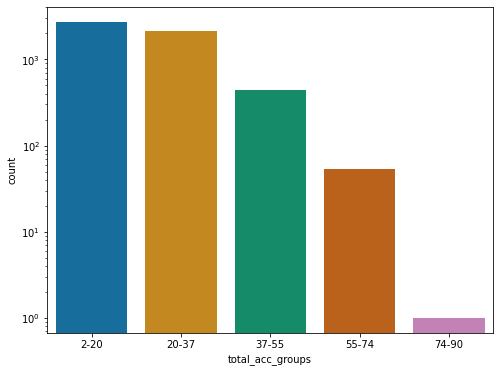

In [44]:
fig,ax =plt.subplots(figsize=(8,6))
ax.set_yscale('log')
sns.countplot(x ='total_acc_groups', data= loan_data[loan_data.loan_status=='Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

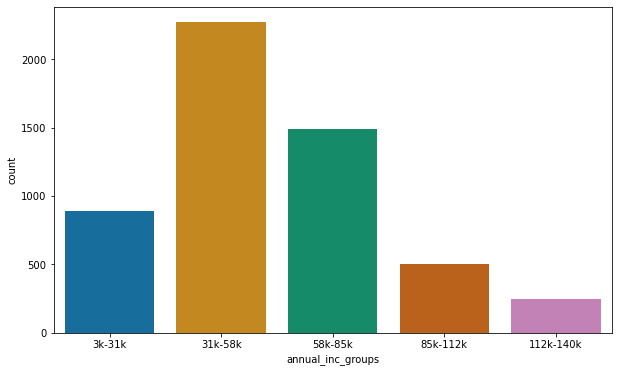

In [45]:
fig, ax =plt.subplots(figsize=(10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

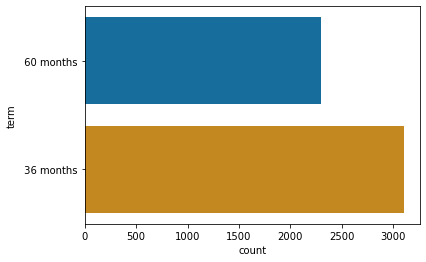

In [46]:
sns.countplot(y ='term', data=loan_data[loan_data.loan_status=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

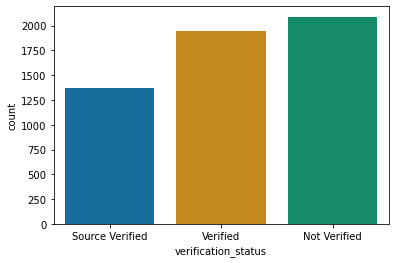

In [47]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])


<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

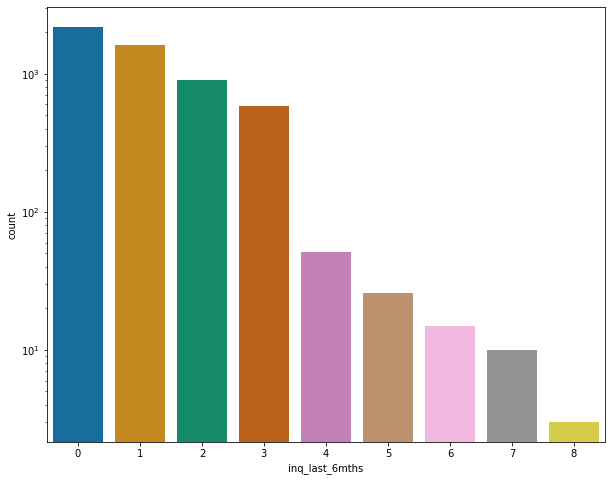

In [48]:
fig, ax=plt.subplots(figsize=(10,8))
ax.set_yscale('log')
sns.countplot(x = 'inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

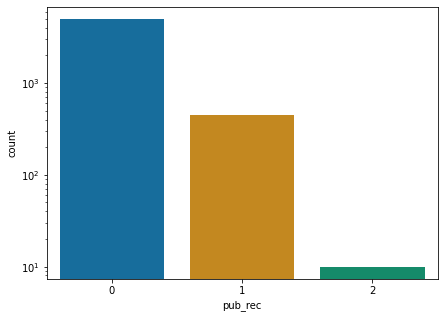

In [49]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])


## Analyzing by issued month and year

In [50]:
#EXTRACTING MONTH AND YEAR
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [51]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<AxesSubplot:xlabel='issue_year', ylabel='count'>

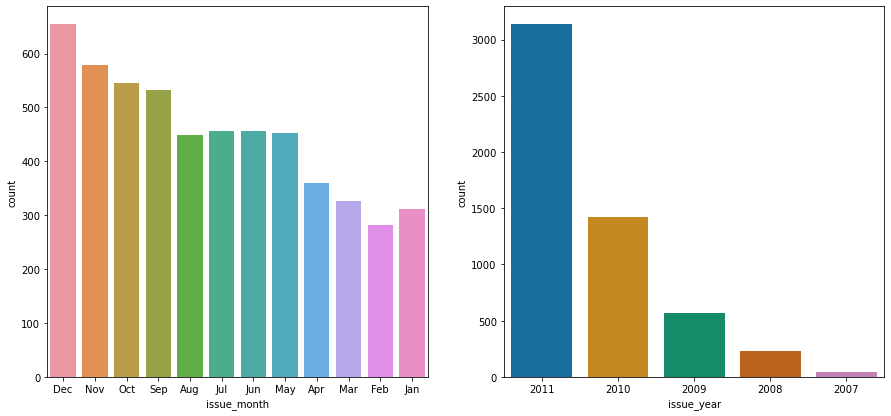

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])


## Results of above analysis
➼ Maximum no. of defaults occured in December.

➼ Maximum no. of loans were issued in year 2011.

## Analyzing installment, dti, loan_amnt

In [53]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

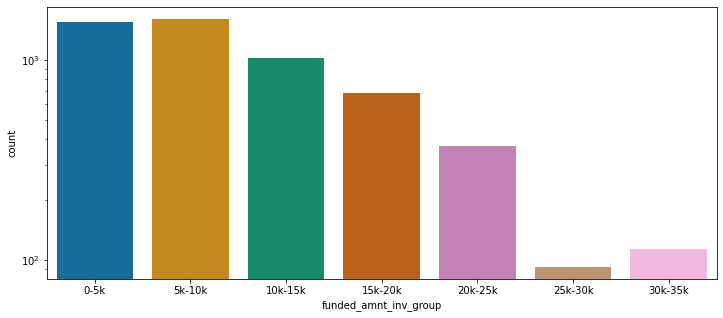

In [54]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data =loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

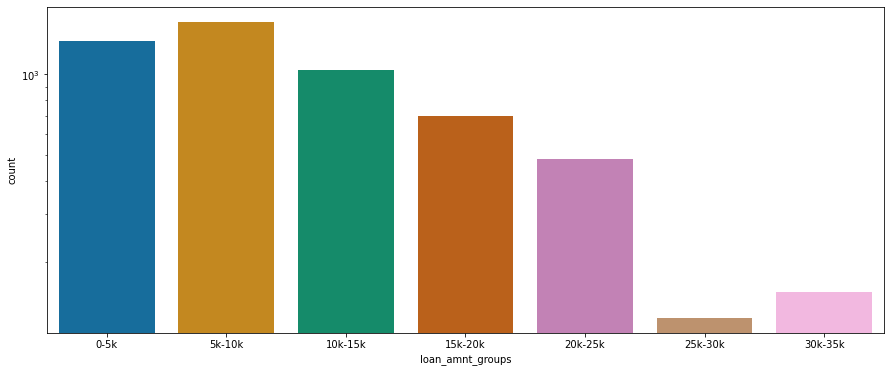

In [55]:
fig, ax =plt.subplots(figsize=(15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups',data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

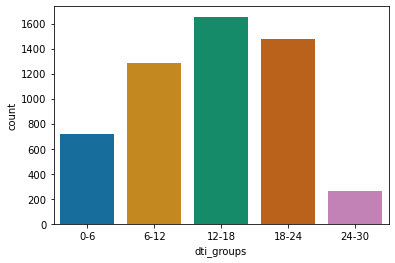

In [56]:
sns.countplot(x='dti_groups',data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

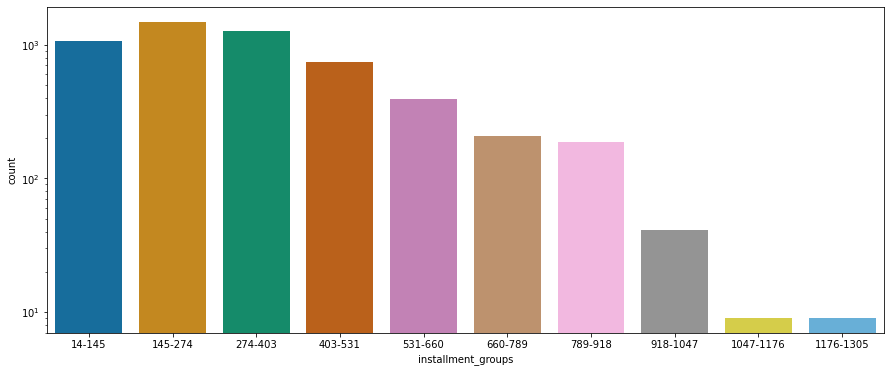

In [57]:
fig, ax= plt.subplots(figsize =(15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

# OBSERVATIONS
### The above analysis shows that there is more probability of defaulting when:


 ➤ Applicants having house_ownership as 'RENT'
 
 ➤ Applicants who use the loan to clear other debts

➤ Applicants who recieve interest @ of 13-17%

➤ Applicants who have income around 31201-5840

➤ Applicants who have 20-37 open_acc

➤ Applicants with employement length of 10

➤ When amount funded by investor is between 5k-10k

➤ Loan amount is between 5429-10357

➤ dti is between 12-18

➤ When monthly installments are between 145-274

➤ Term is of 36 months

➤ Loan status is 'Not verified'

➤ No. of enquiries in last 6 months is 0

➤ When the purpose is 'debt_consolidation'

➤ Grade is 'B'

➤ Total grade of 'B5' level

#### The late months of an year indicated the high possibility of defaulting.
 ➤ There were high no. of defaults in year 2011, could be due to financial crisis.

# CORRELATION MATRIX

In [58]:
numeric_columns = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec']

In [59]:
correlation_matrix = loan_data[numeric_columns].corr()

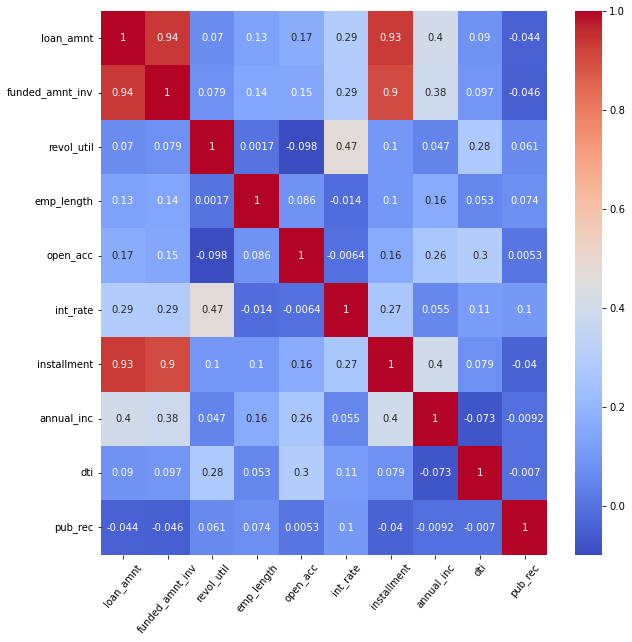

In [60]:
fig, ax =plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.show()

# Analysing annual income with other columns
### 1. Annual income Vs loan purpose

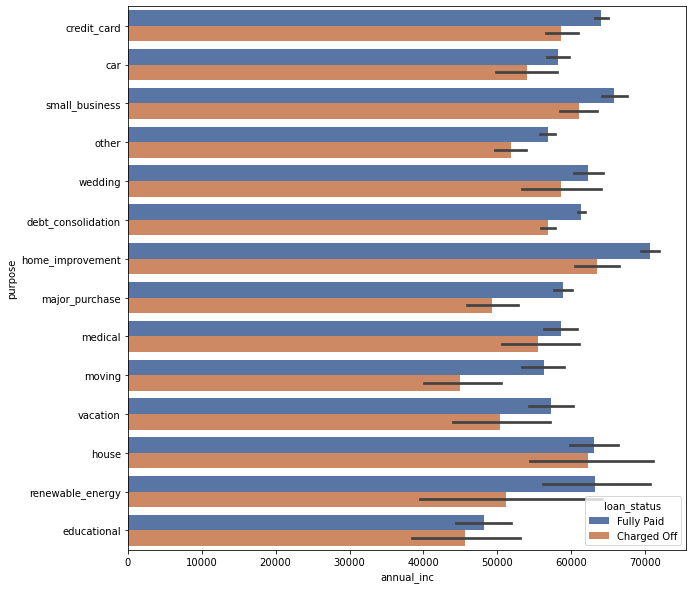

In [61]:
plt.figure(figsize =(10,10))
sns.barplot(data=loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show() 

### 2. Annual income vs home ownership 

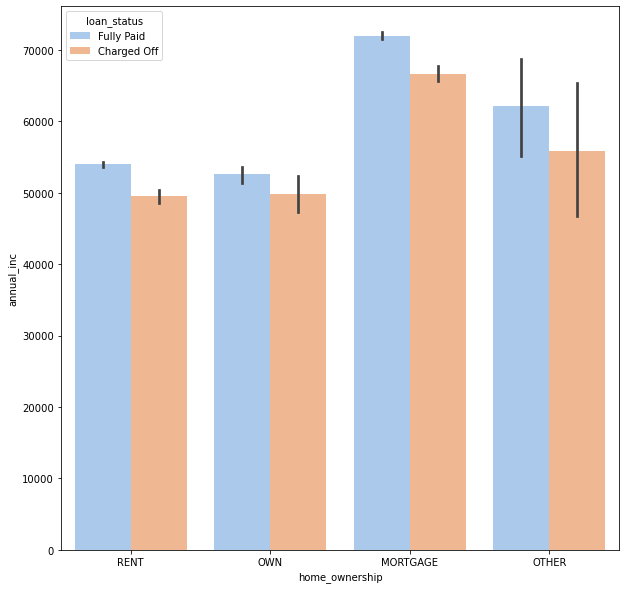

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan_data, x ='home_ownership',y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### 3. Annual income vs int_rate

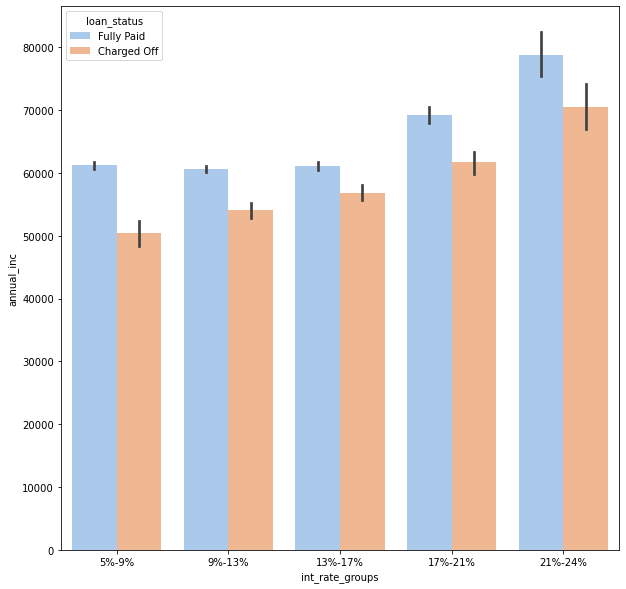

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

# Analysing loan_amount with other columns for more insights

### 1. Loan Amount vs Interest rate

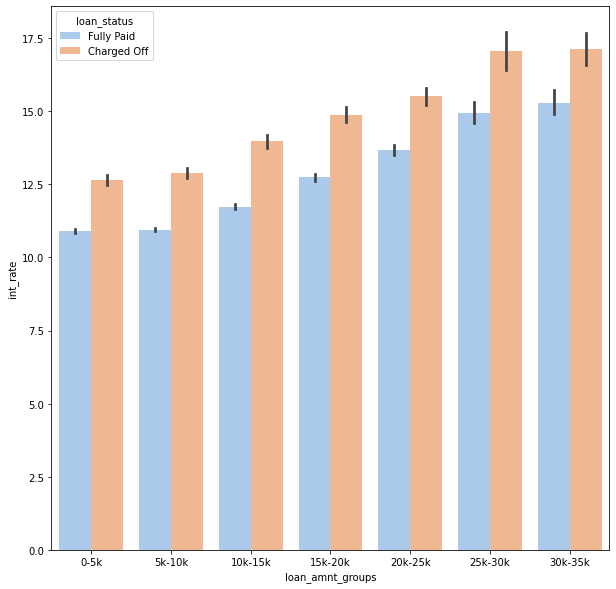

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

### 2. Loan vs Loan purpose

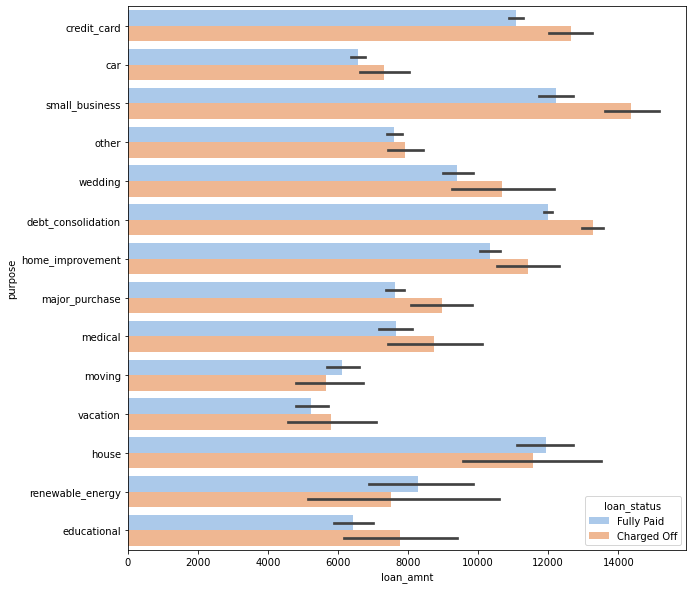

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

### 3. Loan vs house ownership


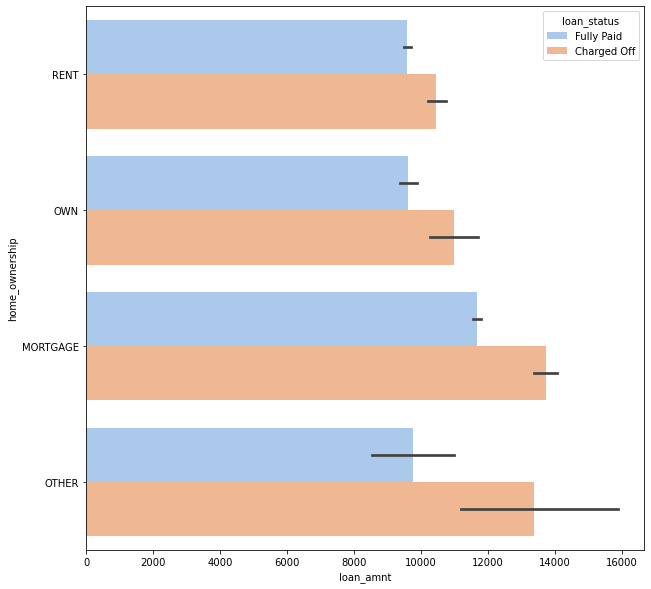

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

### 4. Loan amount vs month issued and year issued 

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

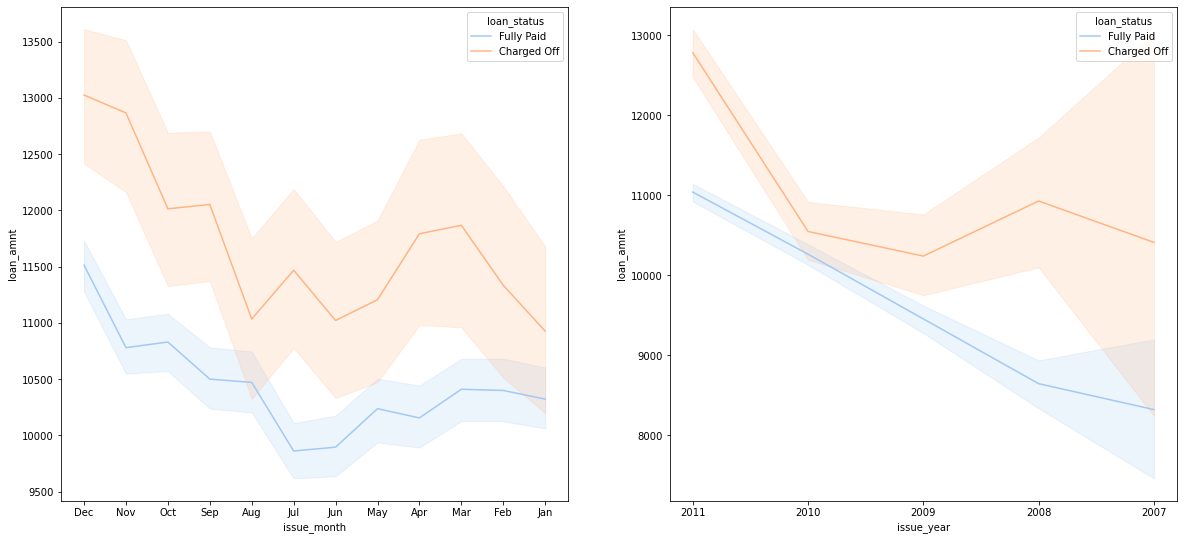

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


### 5. Loan amount vs grade

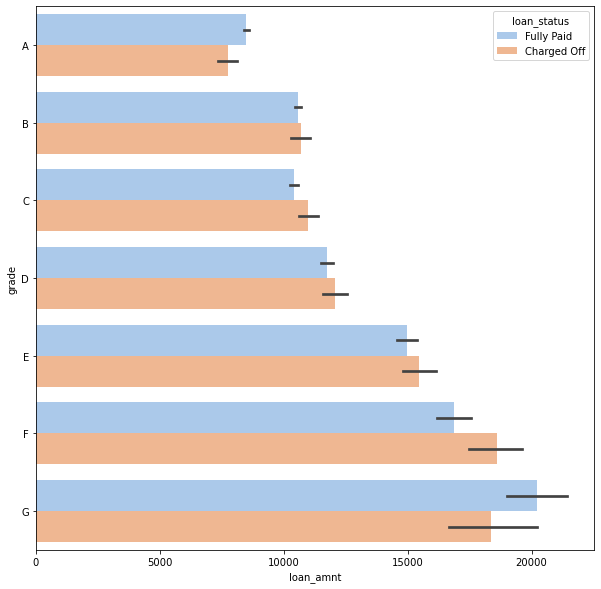

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

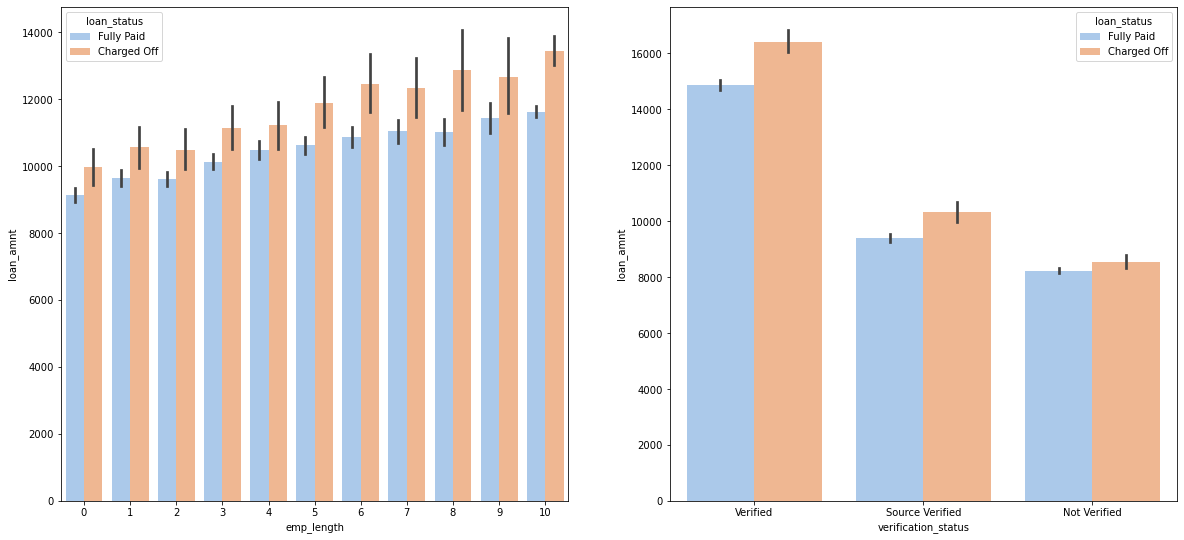

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


### Grade vs interset rate

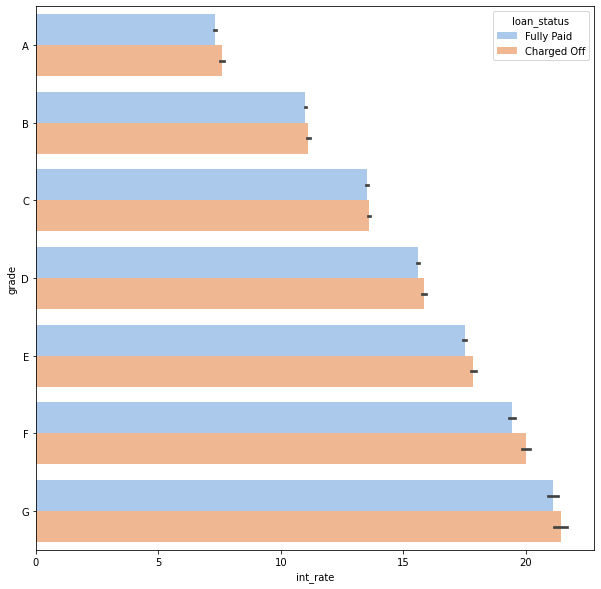

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

# OBSERVATIONS

### From the above analysis, we can say that there is high probability of defaulting when:

➤ Applicant having income of 60k-70k and taking loan for 'home improvement'

➤ Applicant having income of 60k-70k, whose home ownership as 'MORATGAGE'

➤ Applicants having income of 70k-80k and received interest @21-24%

➤ Applicants who took loan for 30k-35k, interest charged @ 15-17.5%

➤ Applicants who took loan for small businesses, having loan amount> 14k

➤ Applicants whose home ownersip is 'Mortgage' and have loan of 14-16k

➤ loan amount of 15-20k and grade F

➤ Employment length is 10yrs, having loan amount 12-14k

➤ loan amount above 16k, and verified

➤ Grade G and interest @20% or above.